# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Fixing random state for reproducibility
np.random.seed(2360873)


In [14]:
prev_renda = pd.read_csv('previsao_de_renda.csv')
prev_renda.info()

base1 = prev_renda[['posse_de_veiculo','posse_de_imovel','qtd_filhos','idade','tempo_emprego','qt_pessoas_residencia','renda']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [15]:
base1.corr()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
posse_de_veiculo,1.000000,-0.014727,0.107959,-0.157837,-0.087514,0.156009,0.063414
posse_de_imovel,-0.014727,1.000000,-0.002525,0.122667,0.000112,-0.007180,0.029827
qtd_filhos,0.107959,-0.002525,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.157837,0.122667,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.156009,-0.007180,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,1.000000


C:\Users\edjun\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


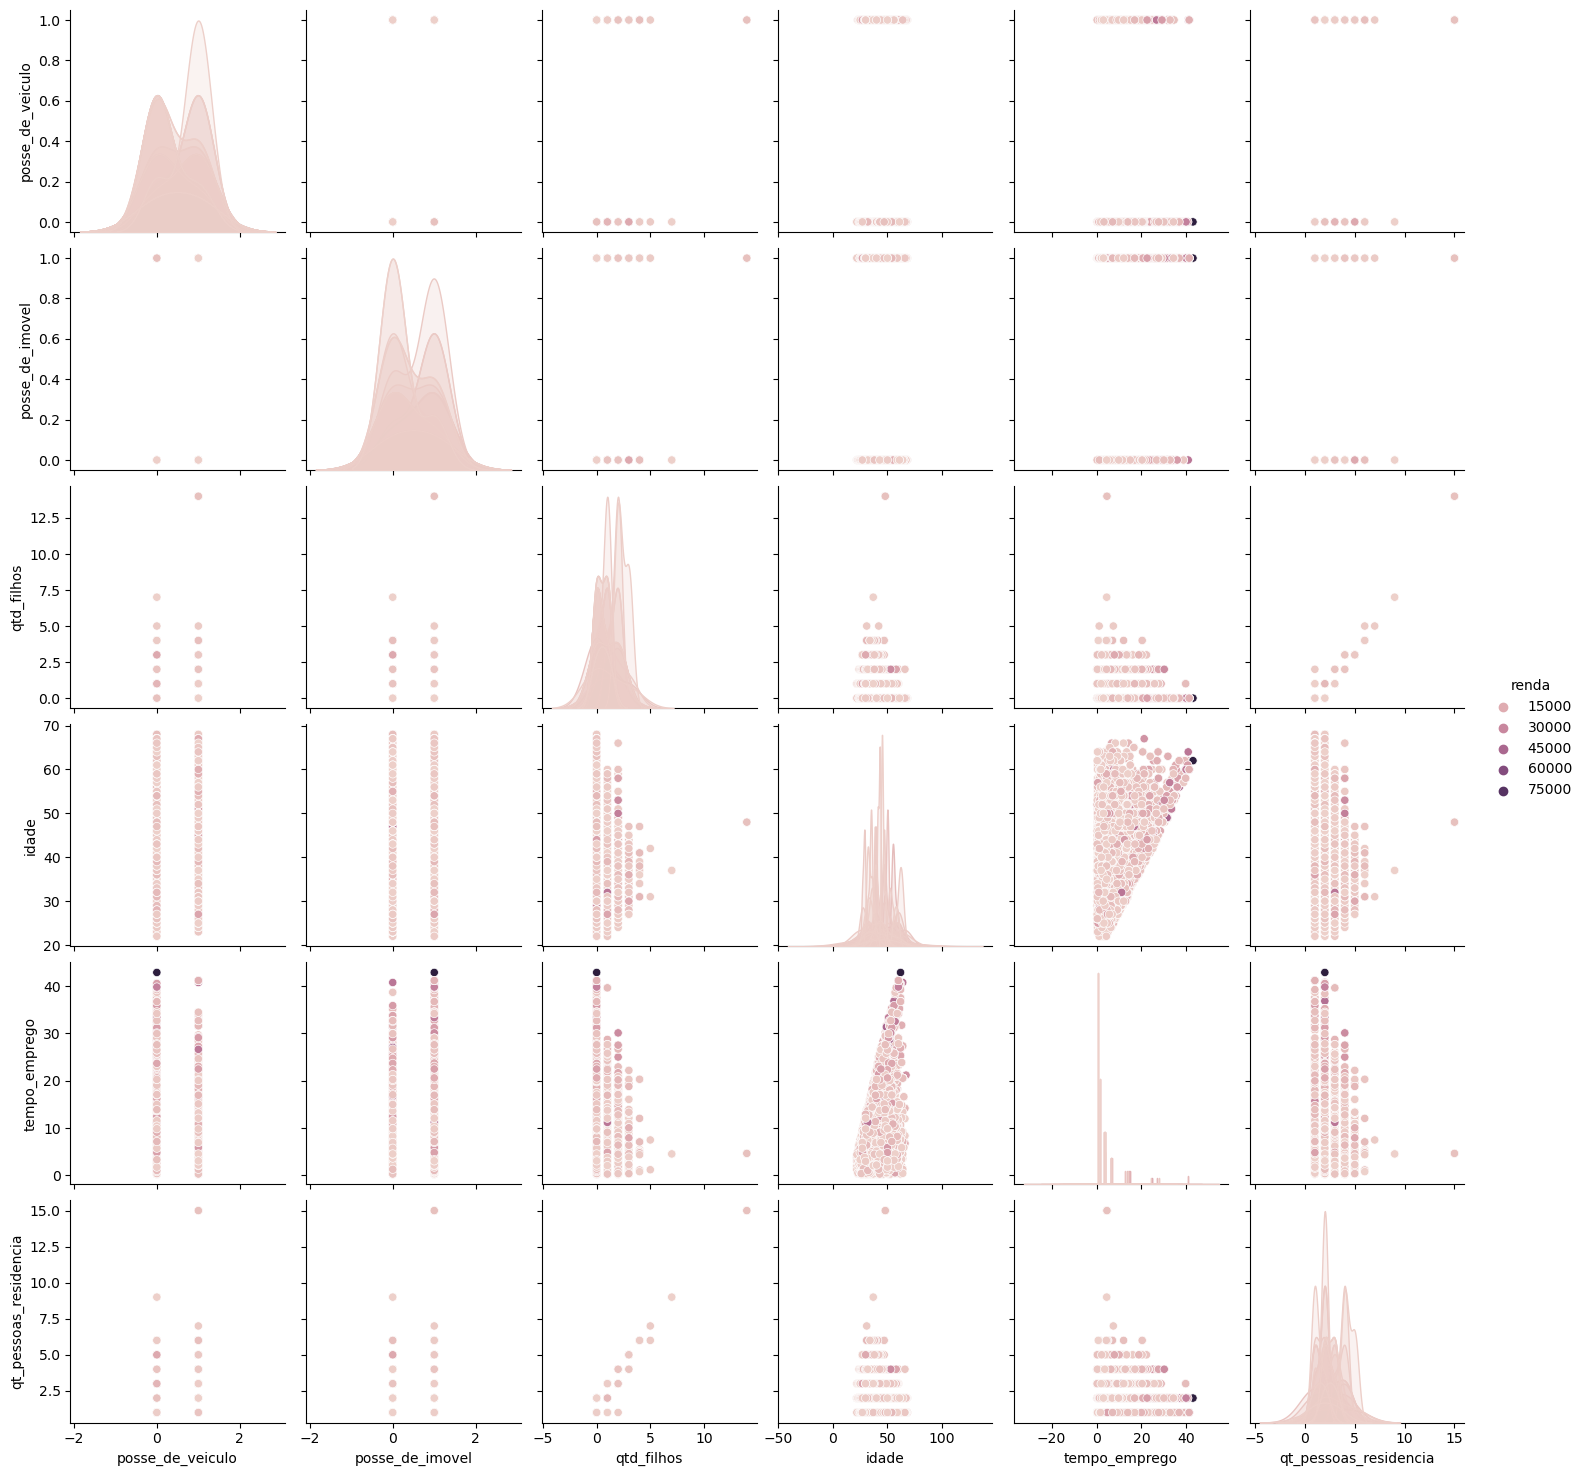

In [19]:
sns.pairplot(base1, hue='renda')

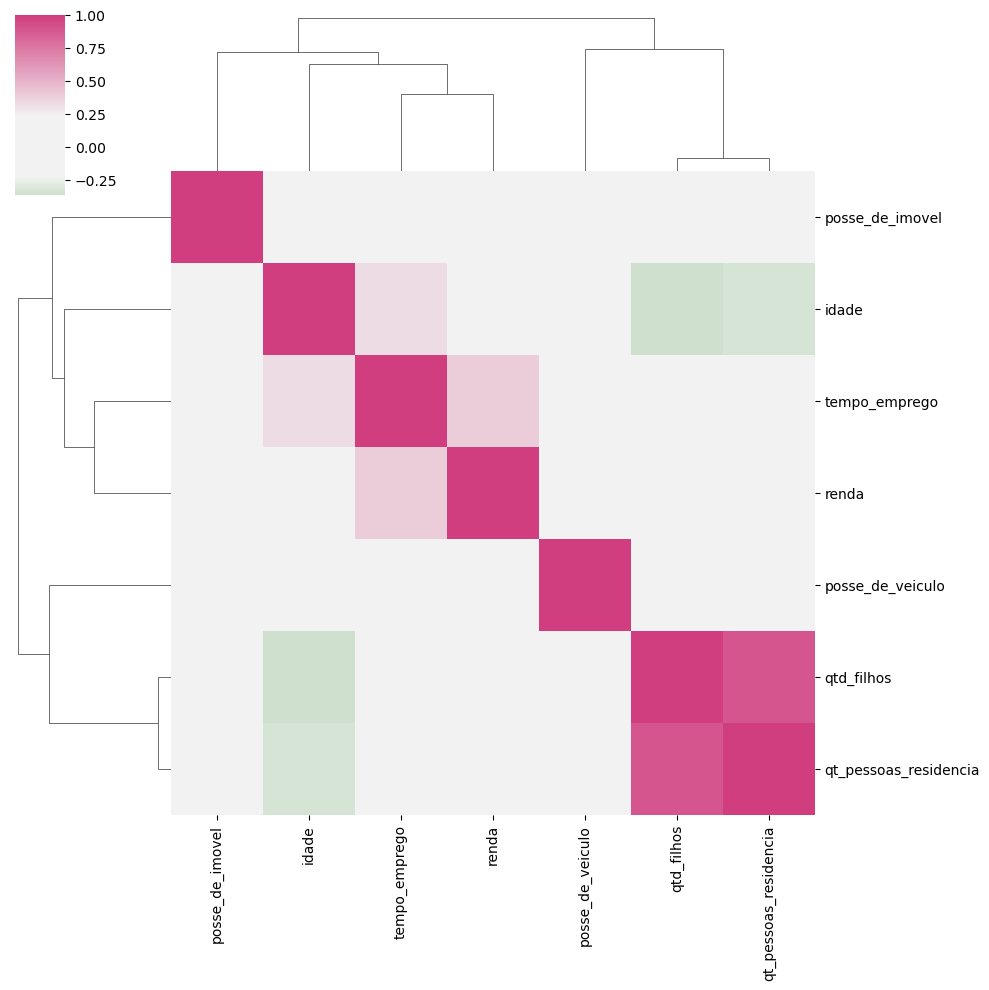

In [20]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(base1.corr(), figsize=(10, 10), center = 0, cmap=cmap)

## Entre as correlações mais fortes, estão as mais óbvias que são idade e tempo de emprego, filho e quantidade de pessoas em casa, acredito que em um modelo esses pares teriam que dar lugar a apenas uma delas. Com a variável resposta, apenas a variável de renda tem uma melhor correlação.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

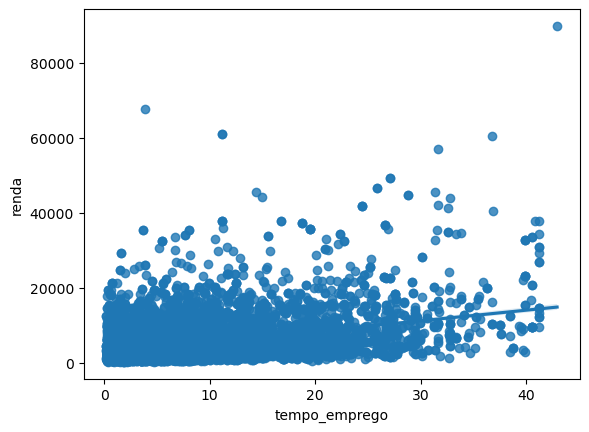

In [22]:
_ = sns.regplot(x='tempo_emprego', y='renda', data = base1)

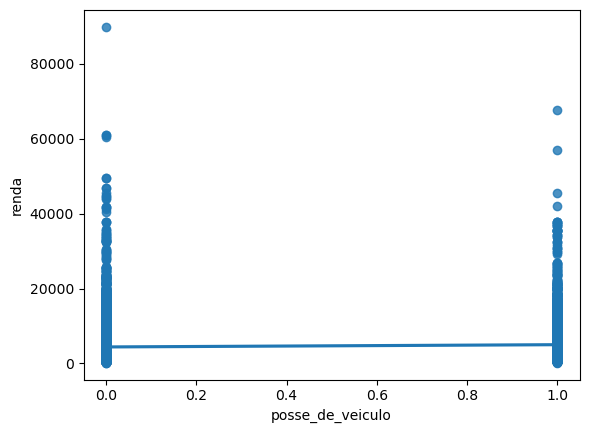

In [23]:
_ = sns.regplot(x='posse_de_veiculo', y='renda', data = base1)

3) Na su aopinião, há outliers na variável renda?

## Sim, valores de renda acima de 40000 são outliers

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [26]:
base1_copy = base1.copy()
base1_copy['log_renda'] = np.log(base1_copy['renda'])

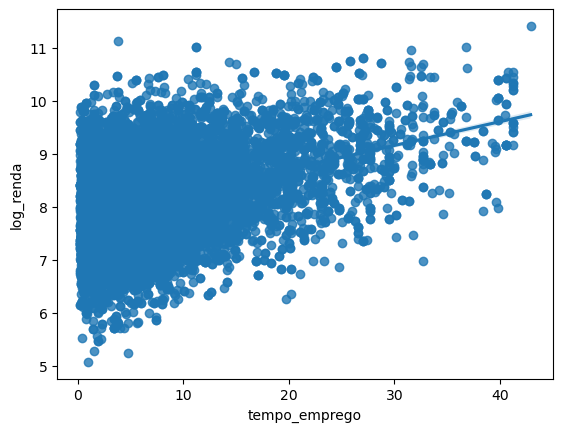

In [27]:
_ = sns.regplot(x='tempo_emprego', y='log_renda', data = base1)

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

## Houve uma melhora, mas como a variável não possui uma alta correlação, a dispersão ainda é evidente no gráfico. Com a mudança, houve uma mudança de percepção da concentração de dados no primeiro quartil. O que é apenas percepção, não fato.

In [30]:
base1['tempo_emprego'].describe()

count    12466.000000
mean         7.750462
std          6.780216
min          0.191781
25%          3.016438
50%          6.016438
75%         10.183562
max         42.906849
Name: tempo_emprego, dtype: float64

In [31]:
base1_copy['tempo_emprego'].describe()

count    12466.000000
mean         7.750462
std          6.780216
min          0.191781
25%          3.016438
50%          6.016438
75%         10.183562
max         42.906849
Name: tempo_emprego, dtype: float64